### Bank Marketing Success Prediction

#### Problem Statement

The data is related with direct marketing campaigns of a banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y)

###### Attribute information

INPUT VARIABLES:

Bank Client Data:
1. age (numeric)
2. job: type of job (categorical)
Values: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", 
"retired", "technician", "services"
3. marital: marital status (categorical)
Values: "married", "divorced", "single" (Note: "divorced" means divorced or widowed)
4. education (categorical)
Values: "unknown", "secondary", "primary", "tertiary"
5. default: has credit in default? (binary)
Values: "yes”, “no"
6. balance: average yearly balance, in euros (numeric) 
7. housing: has housing loan? (binary)
Values: "yes”, “no"
8. loan: has personal loan? (binary)
Values: "yes”, “no"

Related With The Last Contact Of The Current Campaign:

9. contact: contact communication type (categorical)
Values: "unknown”, “telephone”, “cellular"
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical)
Values: "jan", "feb", "mar", ..., "nov", "dec"
12. duration: last contact duration, in seconds (numeric)

Other Attributes:

13. campaign: number of contacts performed during this campaign and for this client (numeric)
Note: Includes last contact
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric)
Note: ‘-1’ means client was not previously contacted
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical)
Values: "unknown”, “other”, “failure”, “success"

OUTPUT/TARGET VARIABLE:

17. y - has the client subscribed a term deposit? (binary)
Values: "yes”, “no"

#### Importing the required libraries

In [4]:
#for comprehensive mathematical functions and linear algebra
import numpy as np

#for expressive datastructures, data manipulation and analysis
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.set_palette("crest", 15)

#for statistical modeling and machine learning
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report,cohen_kappa_score
from sklearn.metrics import roc_curve,roc_auc_score,log_loss
from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy.stats as stats
from scipy.stats import ttest_ind , levene

#for warning control and exception
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#### Data understanding

In [5]:
#creating a DataFrame to read the dataset
data=pd.read_csv("C:/Users/p3acex/OneDrive/Desktop/Git new/bank-full.csv",sep=";")

#reading the first 5 records of the dataset
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
#finding the number of instances and features of the dataset
print("Number of instances (rows): ",data.shape[0])
print("Number of features (columns): ",data.shape[1])

Number of instances (rows):  45211
Number of features (columns):  17


In [7]:
#dataset overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
#the feature "day" should be treated as categorical. Therefore, converting it to the type 'object'
data["day"]=data["day"].astype("object")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  object
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(6), object(11)
memory usage: 5.9+ MB


In [9]:
#summary stats of all numerical features
data.describe()

,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
#brief description on the categorical features
data.select_dtypes('object').describe()

,job,marital,education,default,housing,loan,contact,day,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,31,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,20,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,2752,13766,36959,39922


In [11]:
#categorical features and their unique values
#Note: Target variable included
for col in data.select_dtypes("object"):
    print("{:<10}: {}".format(col,list(data[col].unique())))
    #print(data[col].value_counts(normalize=True),"\n")

job       : ['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', 'retired', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student']
marital   : ['married', 'single', 'divorced']
education : ['tertiary', 'secondary', 'unknown', 'primary']
default   : ['no', 'yes']
housing   : ['yes', 'no']
loan      : ['no', 'yes']
contact   : ['unknown', 'cellular', 'telephone']
day       : [5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28, 29, 30, 2, 3, 4, 11, 17, 18, 24, 25, 1, 10, 22, 31]
month     : ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep']
poutcome  : ['unknown', 'failure', 'other', 'success']
y         : ['no', 'yes']


OBSERVATIONS
1. Features 'loan' and 'default' are overrepresented with the value 'no'
2. From the feature 'contact' it is evident the most frequent mode of contact is through 'cellphone'
3. Number of clients with 'secondary' education are the highest, followed by those having 'tertiary' and 'primary' level of education
4. Comparing the marital status, the majority of the clients are 'married', followed by 'single' and 'divorces'

#### Exploratory Data Analysis (EDA)

###### Finding duplicate rows

In [12]:
data.duplicated().sum()

0

Take-away: <br>There are no duplicates in the dataset

###### Finding missing values

In [13]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Take-away: <br>
There are no missing values in the dataset.

###### Univariate Analysis

In [14]:
#defining the target, categorical and the numerical variables for future references
y=data[["y"]]
df_cat=data.select_dtypes("object").drop("y",1)
df_num=data.select_dtypes("number")

###### (i) Target Variable

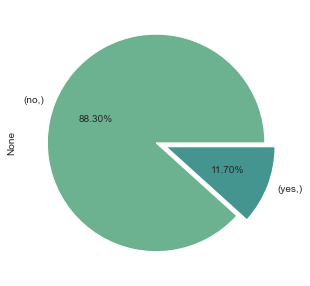

In [15]:
#checking whether the data set is balanced based on the values in the target column
plt.figure(figsize=(5,5))
sns.set_palette("crest",4)
y.value_counts().plot(kind="pie",autopct="%.2f%%",explode=[0,0.1]);

Take-away: <br>
The data seems to be pretty imbalanced. The lion share is occuppied by the clients who haven't subscribed to the term deposit

###### (ii) Numerical Features

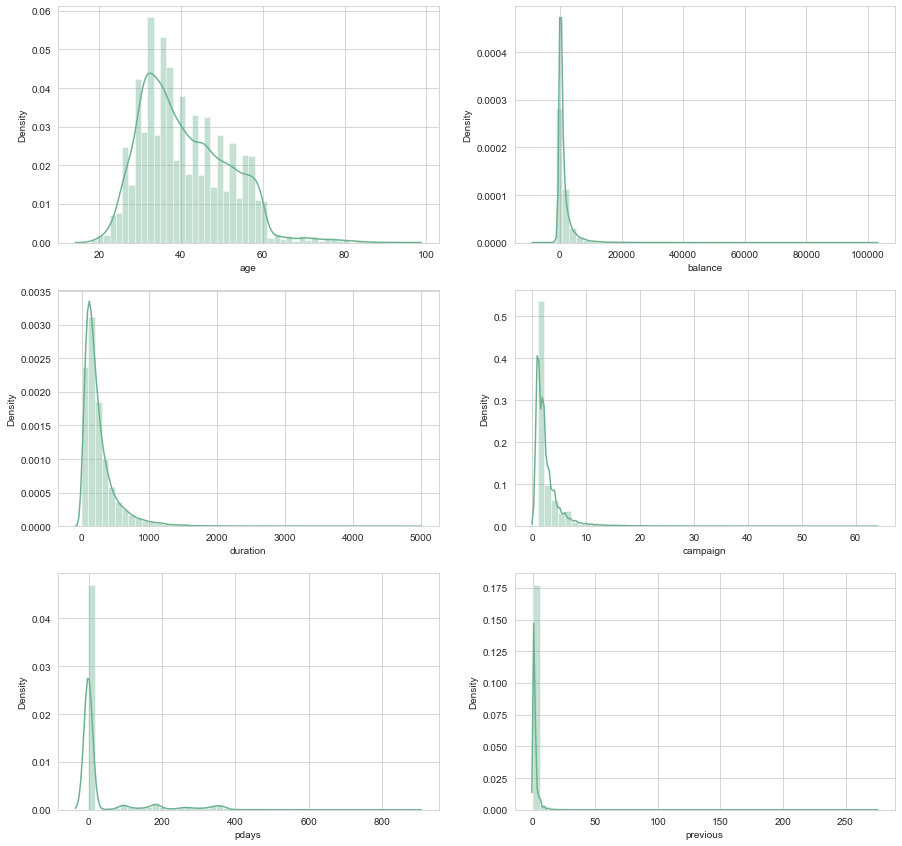

In [16]:
#distribution of numerical features
plt.figure(figsize=(15,20))
plot_num=1
for col in df_num.columns:
    ax=plt.subplot(4,2,plot_num)
    sns.distplot(df_num[col])
    plot_num+=1

Take-aways: 
1. All features except 'age' are heavily right skewed. Their values are scattered over a wide range.<br>
2. The majority of the clients fall into the age group 30 to 45

#### Outlier Analysis

IQR and Outliers of the skewed features


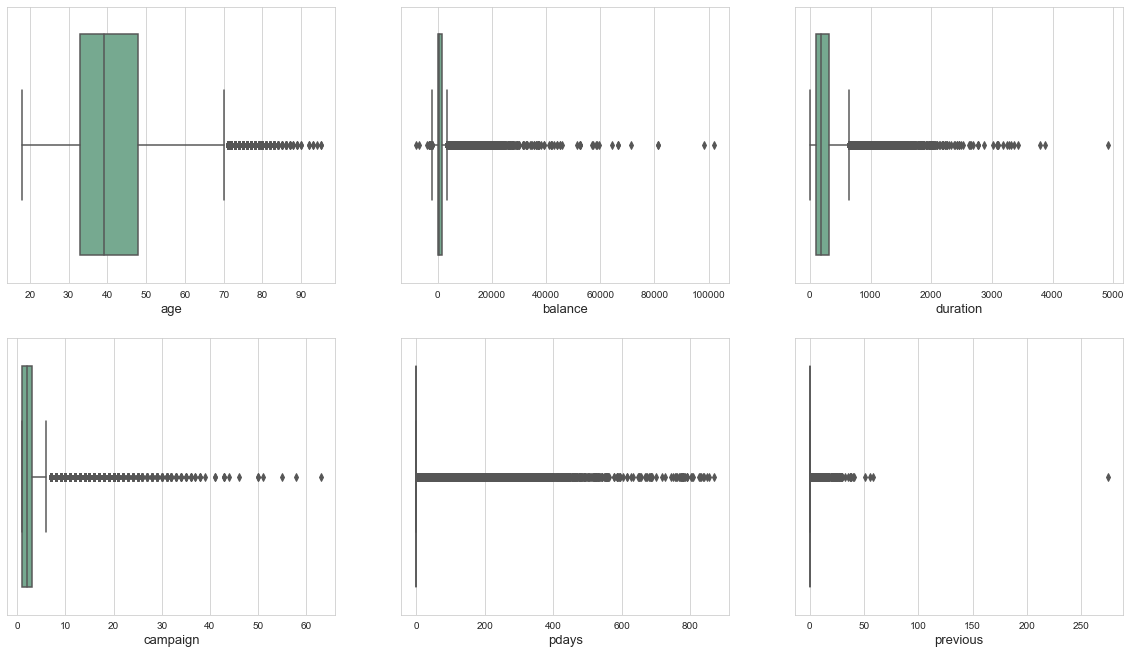

In [17]:
print("IQR and Outliers of the skewed features")
plt.figure(figsize=(20,60))
plot_num=1
for col in df_num.columns:
    ax=plt.subplot(10,3,plot_num)
    sns.boxplot(df_num[col])
    plt.xlabel(col,fontsize=13)
    plot_num+=1

In [18]:
print("Kurtosis:")
df_num.kurt()

Kurtosis:


age            0.319570
balance      140.751547
duration      18.153915
campaign      39.249651
pdays          6.935195
previous    4506.860660
dtype: float64

Take-aways:<br>
1. The features 'balance','duration','campaign','pdays','previous' are leptokurtic, denoting the high number of outliers
2. The feature 'age' on the other hand is mesokurtic, denoting a comparetively lower number of outliers

###### (iii) Categorical Features

In [19]:
df_cat.shape

(45211, 10)

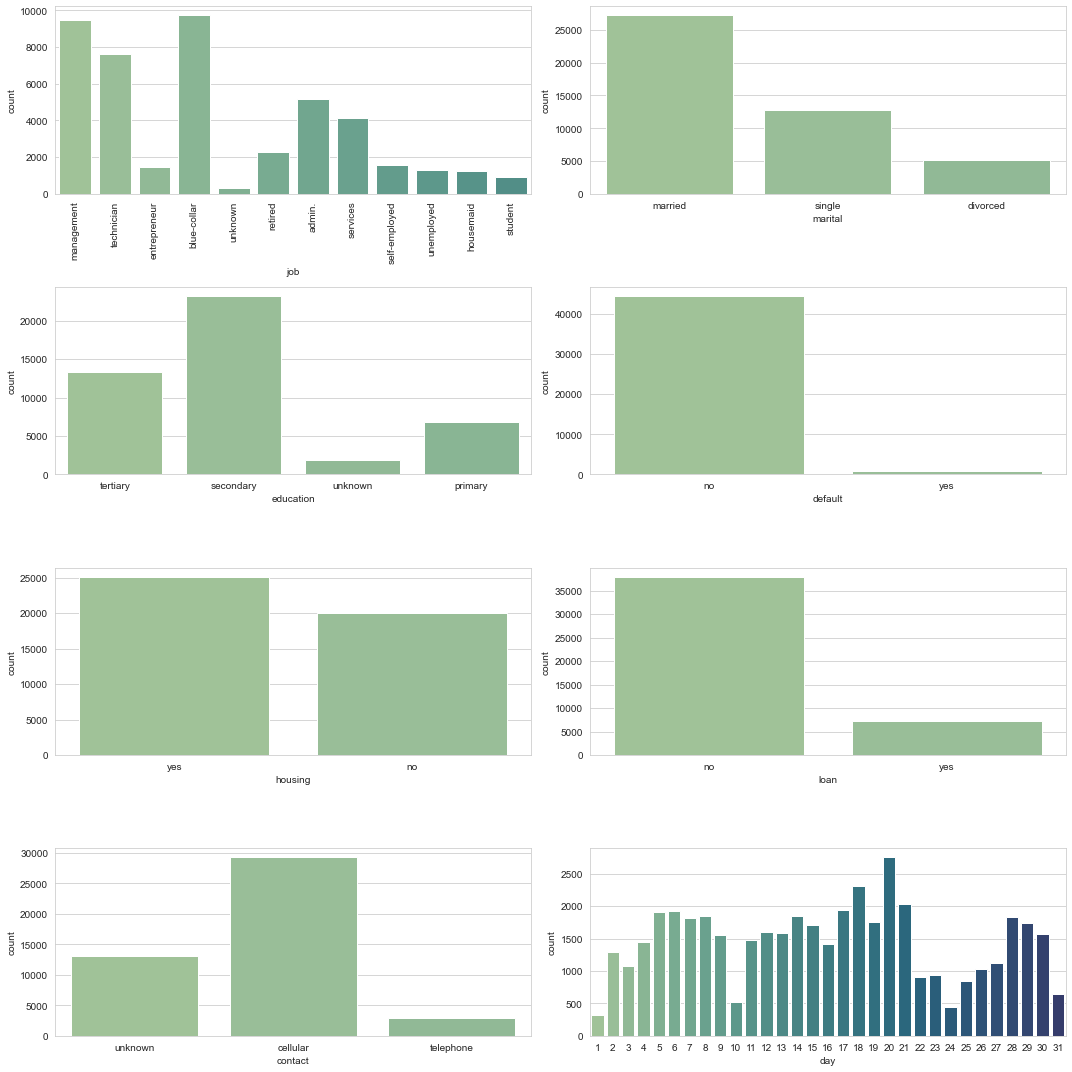

In [20]:
#For the independent categorical variables, we plot the count plot to check the distribution of the variables
sns.set_palette("crest", 31)
fig, axes = plt.subplots(4,2, figsize=(15,15))
for i in range(1,9):
    sns.countplot(x = df_cat.columns[i-1], data=df_cat, ax=axes.flat[i-1])
    
ax1 = axes.flat[0]
labels = ax1.get_xticklabels()
ax1.set_xticklabels(labels = labels, rotation=90)

plt.tight_layout()

Take-away:<br>
Almost all features have high variance

In [21]:
for col in df_cat.columns:
    print("Feature:",col)
    print(data[col].value_counts(normalize=True).mul(100).round(2).astype(str)+"%","\n")

Feature: job
blue-collar      21.53%
management       20.92%
technician        16.8%
admin.           11.44%
services          9.19%
retired           5.01%
self-employed     3.49%
entrepreneur      3.29%
unemployed        2.88%
housemaid         2.74%
student           2.07%
unknown           0.64%
Name: job, dtype: object 

Feature: marital
married     60.19%
single      28.29%
divorced    11.52%
Name: marital, dtype: object 

Feature: education
secondary    51.32%
tertiary     29.42%
primary      15.15%
unknown       4.11%
Name: education, dtype: object 

Feature: default
no     98.2%
yes     1.8%
Name: default, dtype: object 

Feature: housing
yes    55.58%
no     44.42%
Name: housing, dtype: object 

Feature: loan
no     83.98%
yes    16.02%
Name: loan, dtype: object 

Feature: contact
cellular     64.77%
unknown       28.8%
telephone     6.43%
Name: contact, dtype: object 

Feature: day
20    6.09%
18     5.1%
21    4.48%
17    4.29%
6     4.27%
5     4.22%
14    4.09%
8     4.07

POTENTIAL NULL VALUES: 'Unknown'
1. 'Previous' outcome has the highest number of 'unknown' entries (36,959), showing that either this is the first campaign  they were contacted or a lot of values are missing. Should it be the latter, approppriate methods have to be made use to treat the missing values
2. The feature 'contact' has significant no of 'unknown' values (13,020)
3. The features 'job' and 'education' have comparetively lower number of 'unknown' entries with 288 and 1,857 entries respectively

##### Bivariate Analysis

###### (i) Categorical vs Target Variable

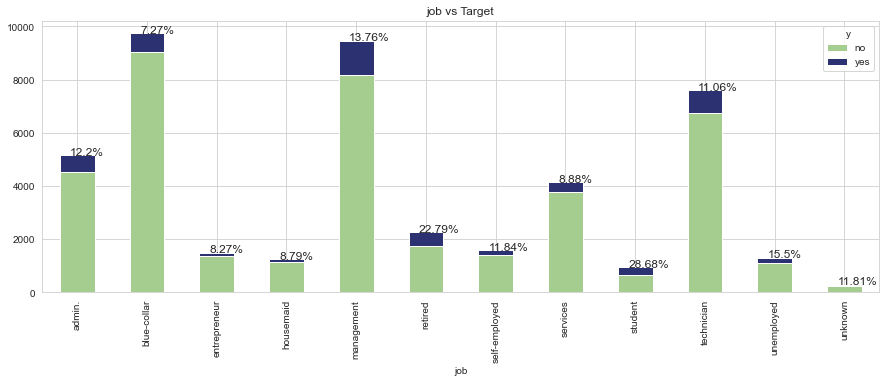

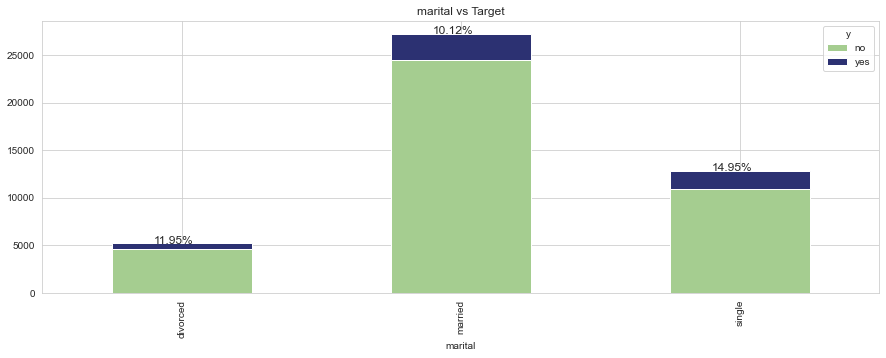

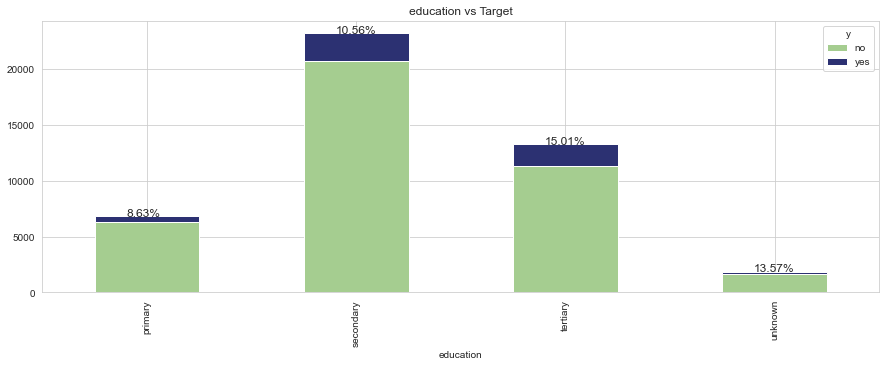

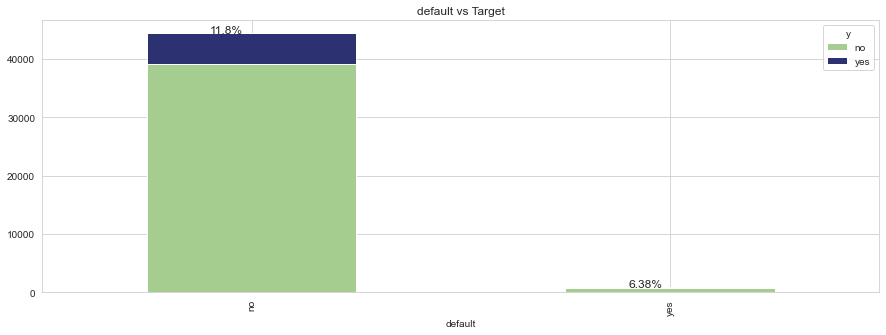

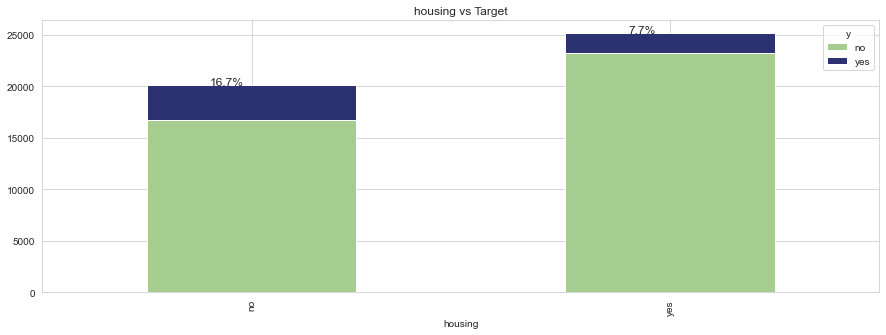

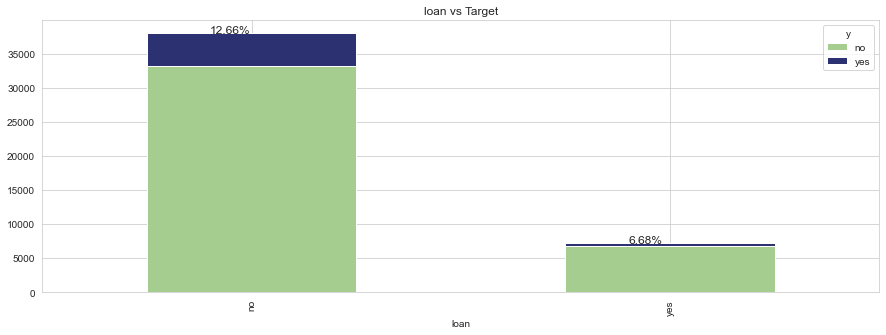

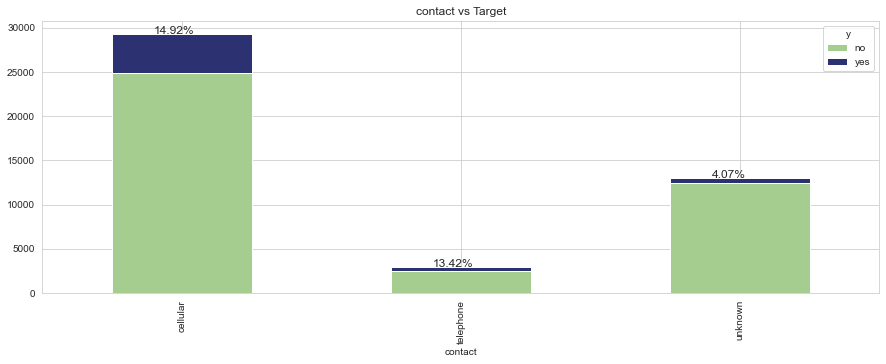

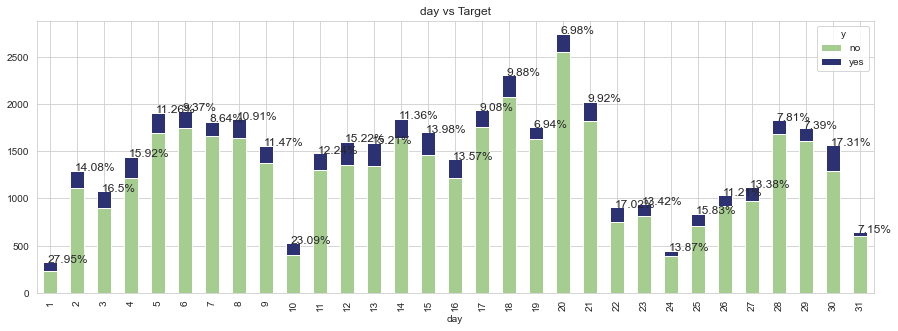

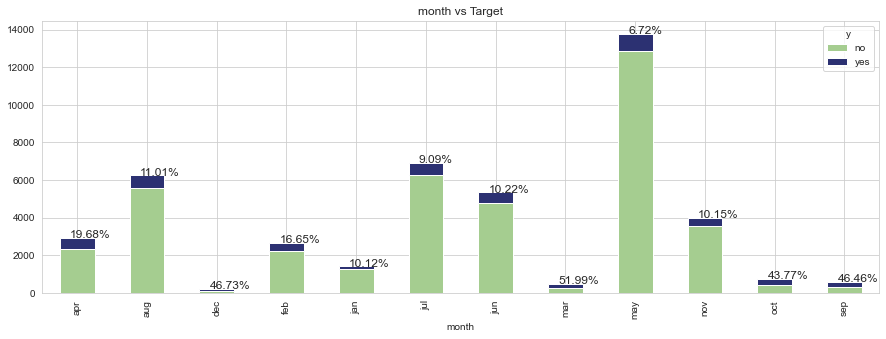

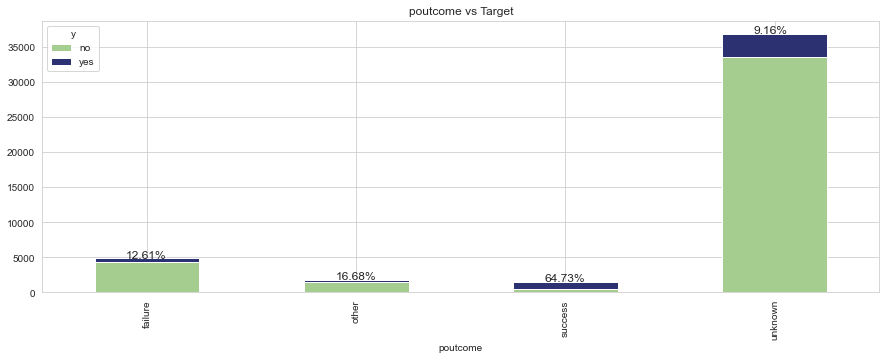

In [19]:
for col in df_cat:
    temp=pd.crosstab(data[col],data["y"]).reset_index()
    temp["percent"]=(temp["yes"]*100/(temp["yes"]+temp["no"])).round(2)

    pd.crosstab(data[col],data["y"]).plot(kind="bar",stacked=True,figsize=[15,5],title=str(col)+" vs Target",cmap="crest")
    for i in range(temp.shape[0]):
        plt.text(x=i-0.1,y=temp.iloc[i][1]+temp.iloc[i][2],s=str(temp.iloc[i][3])+"%",fontsize=12)

Initial inferences:
1. People employed in blue-collar jobs isn't much interested in the subscription
2. In the month of May, though number of records are hight, much subscriptions aren't observed
3. Probability of a client, with standing loan, subscribing for a term deposit seems to be low

###### (ii) Numerical vs Target Variable

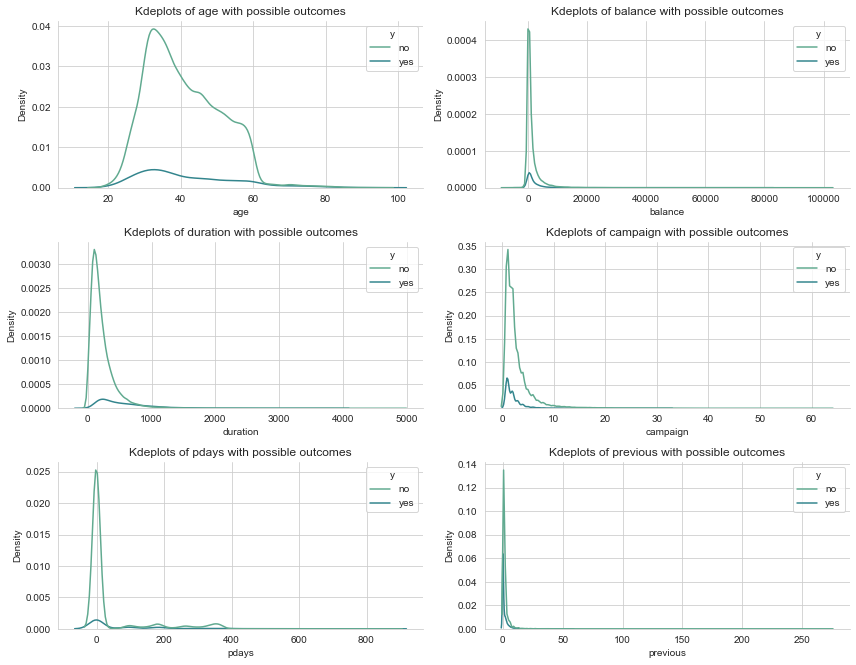

In [30]:
sns.set_palette("crest", 3)
plt.figure(figsize=(12,12))
for i,j in enumerate(df_num.columns): 
    plt.subplot(4,2,i+1)
    sns.kdeplot(data[j] , hue=data['y'])
    sns.despine()
    plt.title("Kdeplots of {} with possible outcomes".format(j))
    plt.tight_layout()    
plt.show()

Take-aways: 
1. Features in comparison with the target outcome 'Yes' have low peakedness.<br>
2. On the other hand, features when compared to the target outcome 'No' are leptokurtic, denoting large number of outliers.

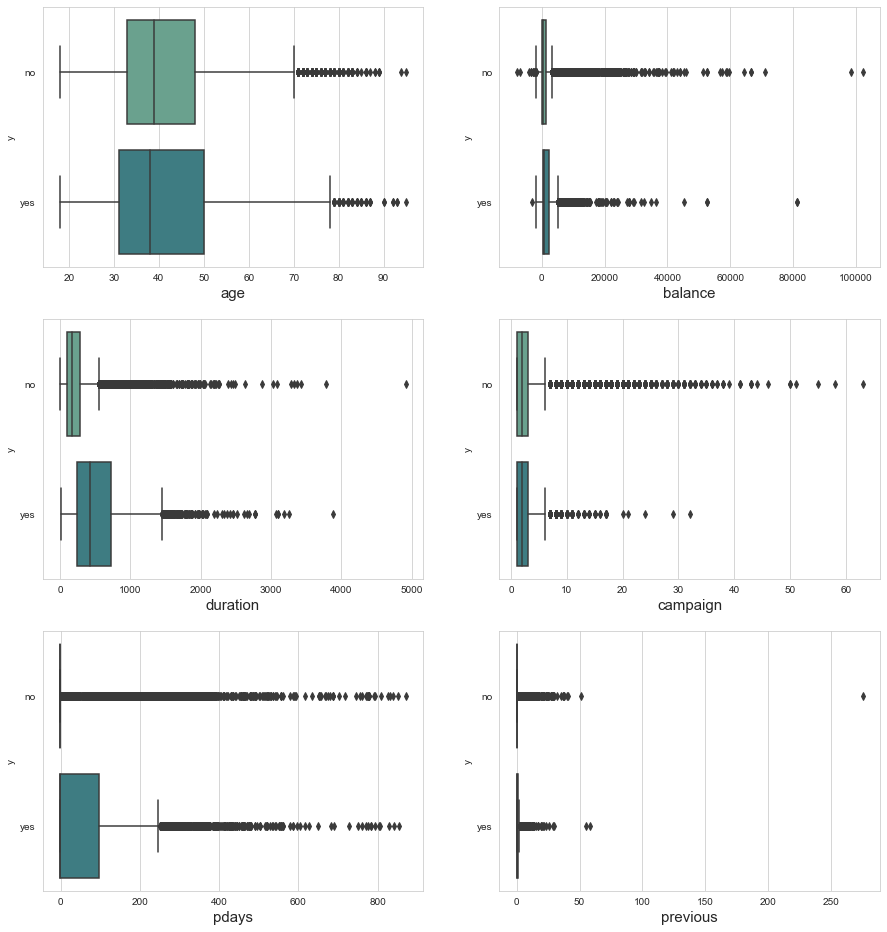

In [31]:
sns.set_palette("crest", 3)
plt.figure(figsize = (15,22))
plot_num = 1
for col in df_num.columns:
    ax = plt.subplot(4, 2, plot_num)
    sns.boxplot(data = data, y = 'y', x = col)
    plt.xlabel(col, fontsize = 15)
    plot_num += 1

Take-aways: 
1. The features 'pdays' and 'duration' of all other features have more variance  when compared with the target outcomes
2. It can be inferred that, the longer the duration, the higher is the chance for the client to subscribe
3. The other features show a similar behaviour for the different target outcomes

###### 2 sample t-test

2 sample t-test is performed to confirm the relation of numerical variable with the target variable<br>
H0: mean of the feature = mean of the target : No relation exists<br>
H1: mean of the feature!= mean of the target : Relation exists

In [32]:
for i in range(len(df_num.columns)):
    samp1 = data[data['y']=='no'][df_num.columns[i]]
    samp2 = data[data['y']=='yes'][df_num.columns[i]]
    tstat, pval = ttest_ind(samp1, samp2)
    print('For column',df_num.columns[i],'t-stat =',tstat,'; p value =',pval/2)

For column age t-stat = -5.350255423036203 ; p value = 4.4128218459611975e-08
For column balance t-stat = -11.25043445878562 ; p value = 1.2605568459375734e-29
For column duration t-stat = -91.28943612670862 ; p value = 0.0
For column campaign t-stat = 15.599948860003781 ; p value = 5.0617368210481484e-55
For column pdays t-stat = -22.151671780724012 ; p value = 1.895276659739017e-108
For column previous t-stat = -19.910901271473993 ; p value = 3.9009151749026054e-88


Take-aways:<br>
1. The p-values for all the features are less than 0.05. So we reject the null hypothesis. Therefore, a relation exists between all the features and the target variable
2. The features with the lowest p-values, namely 'duration','balance' and 'pdays', are the most related

#### Levene Test

Levene is performed to check that variances are equal for all samples <br>
H0: The sample have equal variance <br>
H1: The sample donot have equal variance 

In [33]:
for i in range(len(df_num.columns)):
    samp1 = data[data['y']=='no'][df_num.columns[i]]
    samp2 = data[data['y']=='yes'][df_num.columns[i]]
    tstat, pval = levene(samp1, samp2)
    print('For column',df_num.columns[i],', p value for Levene test=',pval)

For column age , p value for Levene test= 2.420857912510469e-133
For column balance , p value for Levene test= 5.020129382284311e-15
For column duration , p value for Levene test= 0.0
For column campaign , p value for Levene test= 8.220318168029953e-33
For column pdays , p value for Levene test= 3.79055331945749e-108
For column previous , p value for Levene test= 7.801830349772383e-88


Take-aways:<br>
The p-values for all the features are less than 0.05. So we reject the null hypothesis and conclude that the 
Variance are not equal

#### Correlation Analysis

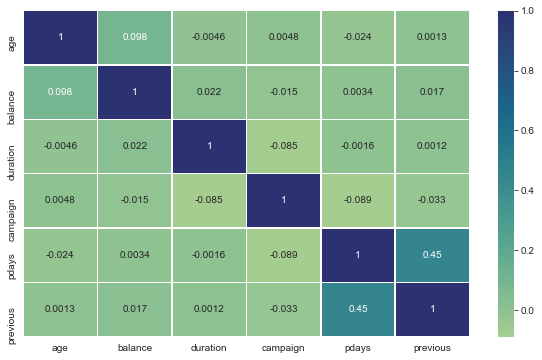

In [34]:
#checking correlation between the numerical features
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),cmap="crest",annot=True,cbar=True,linewidths=0.5);

Take-aways: 
1. Almost no correlation between any of the features is inferred. Therefore, Multicollinearity is NOT observed
2. However, a moderate correlation is observed between the features 'pdays' and 'previous'

In [35]:
# sns.set_palette("crest", 2)
# sns.pairplot(data=df_num.join(y),diag_kind="kde",hue="y");

Take-aways:
1. None of the columns show any significant correlation with each other.<br>
2. A fair uniform distribution of outcomes for most columns is observed.

#### Data Preparation

In [36]:
# Missing value imputation 
# Replacing the unknown class in job and education with mode of the variables (0.64% in Job & 4.6% in education)
data['job'].replace('unknown',data['job'].mode()[0],inplace=True)
data['education'].replace('unknown',data['education'].mode()[0],inplace=True)

In [37]:
data['job'].value_counts()
# Now the 'unknown' class has been replaced by mode of the feature 'job'

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [38]:
data['education'].value_counts()
# Now the 'unknown' class has been replaced by mode of the feature 'education'

secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64

In [39]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,blue-collar,single,secondary,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Feature Engineering

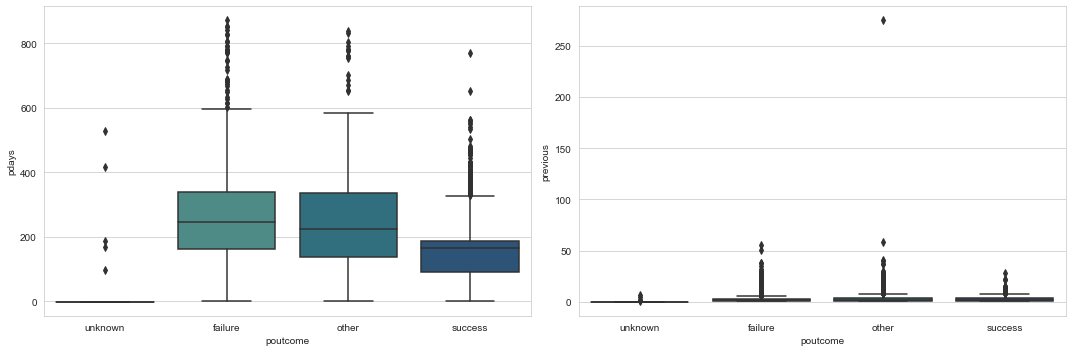

In [40]:
# Columns related to previous marketing campaigns - 'poutcome', 'pdays', 'previous'. We will 
# perform feature engineering on these columns to make the best use of the available data.
# Let's analyze the relation between these columns in detail
sns.set_palette("crest",4)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x = data['poutcome'], y = data['pdays'])
plt.subplot(1,2,2)
sns.boxplot(x = data['poutcome'], y = data['previous'])
plt.tight_layout()
plt.show()

# For poutcome "unknown", almost all the values of pdays are -1 and previous are 0 
# However pdays mean for 'success' is less than for 'failure' & 'other' categories
# Variation in 'previous' column is very less for the different categories

In [41]:
# same is confirmed by the below crosstab for poutcome 'unknown'

pd.crosstab(index=data[data['poutcome']=='unknown']['poutcome'], columns = [data['pdays'],data['previous']]).T

# Out of the 45211  rows 36594 rows are related in these 3 variables.

,poutcome,unknown
pdays,previous,
-1,0,36954
98,1,1
168,5,1
188,2,1
416,2,1
528,7,1


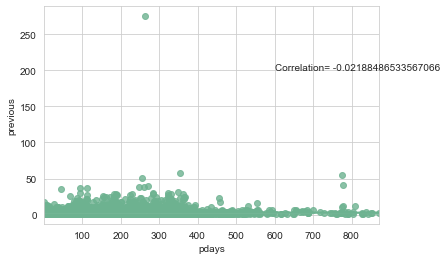

In [42]:
sns.regplot(data[data['pdays']!=-1]['pdays'], data[data['pdays']!=-1]['previous'])
plt.text(x=600, y=200, s = 'Correlation= '+str(data[data['pdays']!=-1]['pdays'].corr(data[data['pdays']!=-1]['previous'])))
plt.show()

# no correlation when you remove pdays = -1

In [43]:
# Converting the feature 'Day' to week number of the month
def week_num(day):
    if day<=7:
        return "Week1"
    elif day<=14:
        return "Week2"
    elif day<=21:
        return "Week3"
    elif day<=28:
        return "Week4"
    else:
        return "Week5"
    
data["day"]=data["day"].apply(week_num)

In [44]:
df_bank= data.copy()

In [45]:
# Hence we decide to remove 'pdays' and 'previous' from the features since they show high
# degree of correlation with 'poutcome' (majority common values pdays -1 = previous 0 = poutcome 'unknown')

data.drop(['pdays','previous'], axis=1, inplace=True)

###### (i) Encoding Categorical variables

In [46]:
# Binary conversion for the values 'Yes'/'No' to 1/0
binary_cols=["default","housing","loan","y"]
for col in binary_cols:
    data[col]=pd.DataFrame(LE.fit_transform(data[col]))

In [47]:
# Frequency encoding the 'month' , 'job' and 'day' features

data["month"]=data["month"].replace(data["month"].value_counts(normalize=True))

data["job"]=data["job"].replace(data["job"].value_counts(normalize=True))

data["day"]=data["day"].replace(data["day"].value_counts(normalize=True))

In [48]:
# Ordinal Encoding the 'education' feature

data['education'] = data['education'].map({'primary':0,'secondary':1,'tertiary':2})

In [49]:
# Encoding based on the distribution of the class labels of the feature with respect to the target variables 
# Target Encoding

data["poutcome"]=data["poutcome"].replace({ "unknown":0, "success":1, "other":0.4, "failure":0.2})

data["marital"]=data["marital"].replace({ "married":0.6, "divorced":0.75, "single":1})

data["contact"]=data["contact"].replace({ "unknown":0, "cellular":1, "telephone":0.8})


###### (ii) Scaling Numerical variables

In [50]:
# To transform the data into a common scale we are using Standard Scaler
df_num=pd.DataFrame(SS.fit_transform(df_num),columns=df_num.columns,index=df_num.index)
df_num.drop(['pdays','previous'], axis=1, inplace=True)

In [51]:
# Updating the dataframe with the scaled values
for col in df_num.columns:
    data[col]=df_num[col]
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,1.606965,0.209197,0.6,2,0,0.256419,1,0,0.0,0.216717,0.304483,0.011016,-0.569351,0.0,0
1,0.288529,0.168034,1.0,1,0,-0.437895,1,0,0.0,0.216717,0.304483,-0.416127,-0.569351,0.0,0
2,-0.747384,0.032890,0.6,1,0,-0.446762,1,1,0.0,0.216717,0.304483,-0.707361,-0.569351,0.0,0
3,0.571051,0.221627,0.6,1,0,0.047205,1,0,0.0,0.216717,0.304483,-0.645231,-0.569351,0.0,0
4,-0.747384,0.221627,1.0,1,0,-0.447091,0,0,0.0,0.216717,0.304483,-0.233620,-0.569351,0.0,0


### Modelling

#### Logistic Regression: Full Model

In [52]:
# Splitting the data into Independent and Dependent variable

X=data.drop("y",1)
y=data[["y"]]
X=sm.add_constant(X)

In [53]:
# Train-Test split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36168, 15)
(36168, 1)
(9043, 15)
(9043, 1)


#### Model Training

In [54]:
# Building the model on the train data

model=sm.Logit(y_train,X_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.250616
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                36168
Model:                          Logit   Df Residuals:                    36153
Method:                           MLE   Df Model:                           14
Date:                Wed, 27 Apr 2022   Pseudo R-squ.:                  0.3061
Time:                        12:33:32   Log-Likelihood:                -9064.3
converged:                       True   LL-Null:                       -13062.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0478      0.146    -20.891      0.000      -3.334      -2.762
age            0.0394      0.021      1.889      0.059      -0.001       0.080
job           -0.9913      0.281     -3.526      0.000      -1.542      -0.440
marital        0.9590      0.121      7.902      0.000       0.721       1.197
education      0.1903      0.032      5.972      0.000       0.128       0.253
default       -0.2759      0.184     -1.499      0.134      -0.637       0.085
balance        0.0441      0.017      2.618      0.009       0.011       0.077
housing       -0.6775      0.044    -15.563      0.000      -0.763      -0.592
loan          -0.5747      0.065     -8.903      0.000      -0.701      -0.448
contact        0.8997      0.065     13.761      0.000       0.772       1.028
day           -1.5943      0.293     -5.437      0.000      -2.169      -1.020
month         -2.8327      0.241    -11.743      0.000      -3.305      -2.360
duration       1.0573      0.018     58.086      0.000       1.022       1.093
campaign      -0.3657      0.035    -10.517      0.000      -0.434      -0.298
poutcome       2.4918      0.069     36.093      0.000       2.356       2.627
==============================================================================
"""

##### Odds of the predictors

In [55]:
df_odds = pd.DataFrame(np.exp(model.params), columns = ['odds'])
df_odds['prob'] = df_odds['odds']/(1+df_odds['odds'])
df_odds

,odds,prob
const,0.047463,0.045313
age,1.040153,0.509841
job,0.371105,0.270661
marital,2.608986,0.722914
education,1.209563,0.547422
default,0.758898,0.431462
balance,1.045102,0.511027
housing,0.507882,0.336818
loan,0.562851,0.360144
contact,2.458814,0.710884


#### Model Prediction

In [56]:
# Predicting probability for X test and X train

y_train_prob = model.predict(X_train)
y_test_prob = model.predict(X_test)

In [57]:
#Since the target variable can take only two values either 0 or 1. We decide the cut-off of 0.5. 
#i.e. if 'y_pred_prob' is less than 0.5, then consider it to be 0 else consider it to be 1.

y_train_pred = y_train_prob.apply(lambda x: 0 if x<0.5 else 1)
y_test_pred = y_test_prob.apply(lambda x: 0 if x<0.5 else 1)

#### Assumptions of Logistic Regression

###### i. Assumption 1— Appropriate Outcome Type

Logistic regression generally works as a classifier, so the type of logistic regression utilized (binary, multinomial, or ordinal) must match the outcome (dependent) variable in the dataset.<br>
We can check this assumption by looking at the target variable

In [58]:
data["y"].nunique()

2

Takeaway: The target variable has only binary values. Therefore the assumption is satisfied. <br>
The values and their counts are given below:

In [59]:
data["y"].value_counts()

0    39922
1     5289
Name: y, dtype: int64

###### Assumption 2 — Independence of error

Here we check if there are any duplicate responses

In [60]:
data.duplicated().sum()

0

Takeaway: There are no duplicate responses in the data. Therefore, the assumption is satisfied.

###### Assumption 3 — Linearity of independent variables and log-odds

One of the critical assumptions of logistic regression is that the relationship between the logit (aka log-odds) of the outcome and each continuous independent variable is linear.<br>

A Box-Tidwell test can be used to check for linearity between the predictors and the logit. This is done by adding log-transformed interaction terms between the continuous independent variables and their corresponding natural log into the model. <br> Those interactions with a p_value<=0.05 rejects the null hypothesis indicating the presence of non-linearity between the predictors and the logit.

The simplest method to check for the assumption is by visually inspecting the scatter plot between each continuous predictor and the logit values of the target.

In [61]:
X=data.drop("y",1)
y=data[["y"]]
X=sm.add_constant(X)

In [62]:
logit_model=sm.Logit(y,X).fit()
predicted=logit_model.predict(X)

log_odds=np.log(predicted/(1-predicted))

Optimization terminated successfully.
         Current function value: 0.249974
         Iterations 8


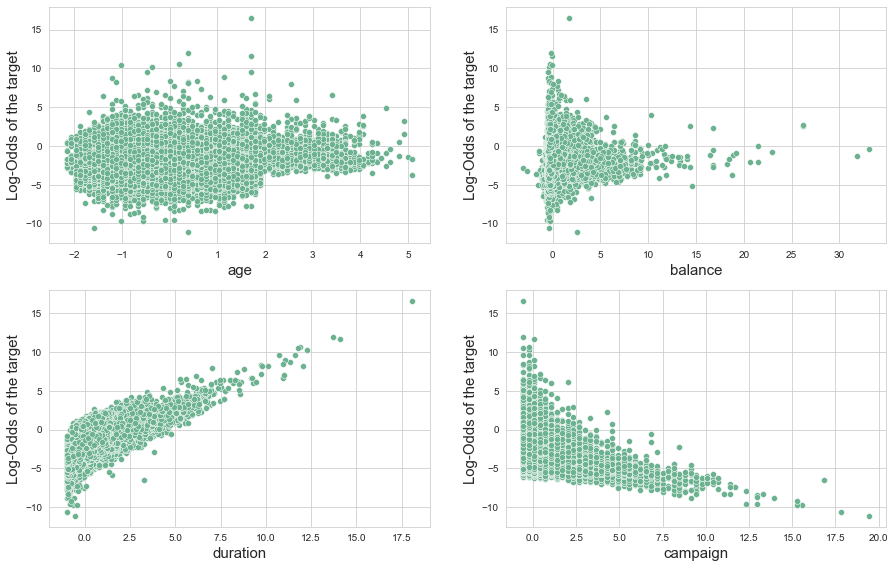

In [63]:
num_col = ["age","balance","duration","campaign"]

plt.figure(figsize=(15,20))
plot_num=1
for col in num_col:
    ax=plt.subplot(4,2,plot_num)
    sns.scatterplot(x=data[col],y=log_odds)
    plt.xlabel(col,fontsize=15)
    plt.ylabel("Log-Odds of the target",fontsize=15)
    plot_num+=1

Takeaway: The above scatter plot shows a clear non-linear pattern of age, balance vs. the log-odds, thereby implying that the assumption of logit linearity is violated.

###### Assumption 4 — No strongly influential outliers

Logistic regression assumes that there are no highly influential outlier data points, as they distort the outcome and accuracy of the model.<br>
Note that not all outliers are influential observations. Rather, outliers have the potential to be influential.

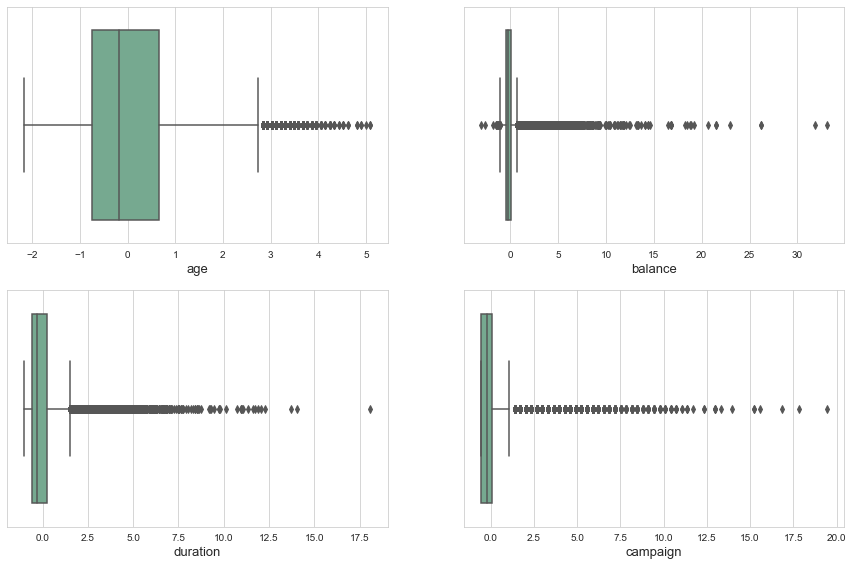

In [64]:
plt.figure(figsize=(15,20))
plot_num=1
for col in num_col:
    ax=plt.subplot(4,2,plot_num)
    sns.boxplot(data[col])
    plt.xlabel(col,fontsize=13)
    plot_num+=1

Note: The above representation is for the scaled data.

Takeaway: Influencial outliers are present. Therefore, assumption is violated.

###### Assumption 5 — Absence of Multicollinearity

Multicollinearity corresponds to a situation where the data contain highly correlated independent variables. This is a problem because it reduces the precision of the estimated coefficients, which weakens the statistical power of the logistic regression model.

Presence of multicollinearity can be checked using the determinant of correlation or can be visually checked using a heatmap of the correlation matrix.<br>
Determinant of correlation is given by:

In [65]:
np.linalg.det(data[num_col].corr())

0.9826598271578231

Variance Inflation Factor (VIF) measures the degree of multicollinearity in a set of independent variables

In [66]:
vif_score=pd.DataFrame({"Features":num_col})
vif_score["Score"]=[variance_inflation_factor(data[num_col].values,i) for i in range (len(num_col))]
vif_score.sort_values("Score",ascending=False).head()

,Features,Score
1,balance,1.010327
0,age,1.009733
2,duration,1.007663
3,campaign,1.007401


Takeaway: Since the value of determinant of correlation is close to 1, and the VIF score is less than 5, there is no severe multicollinearity. <br>Therefore, the assumption is satisfied.

###### Assumption 6 — Sufficiently large sample size

There should be an adequate number of observations for each independent variable in the dataset to avoid creating an overfit model.
A dataset is assumed to be large sample sized if the total number of observations is greater than 500.


In [67]:
data.shape

(45211, 15)

##### Model Evaluation Metrics

###### (i) Deviance

In [68]:
log_reg=LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [69]:
#It is a measure of goodness of fit for Logistic Regression. The smaller the value, the better the fit
print('Deviance :',2*metrics.log_loss(y, log_reg.predict_log_proba(X)))

Deviance : 1.3862943611198906


###### (ii) AIC

In [70]:
#It is a relative measure of model evaluation. It gives a trade-off between model accuracy and model complexity.
#We can use the AIC value to compare different models created on the same dataset.
print("The AIC of the model is:",model.aic.round(4))

The AIC of the model is: 18158.5667


###### (iii) Pseudo R-squ.

In [71]:
print(' Pseudo R-squ. :',model.prsquared)

 Pseudo R-squ. : 0.30605601482860134


Take-away: The Pseudo R-squ. obtained, 0.3060 (~30%), from the above model summary is the value of McFadden's R-squared. This metric is used to evaluate the performance of the model.

##### Model Performance Metrics

#### (i) Confusion Matrix

In [72]:
test_cm=pd.DataFrame(confusion_matrix(y_test,y_test_pred),columns=["Predicted 0","Predicted 1"],index=["Actual 0","Actual 1"])
train_cm=pd.DataFrame(confusion_matrix(y_train,y_train_pred),columns=["Predicted 0","Predicted 1"],index=["Actual 0","Actual 1"])

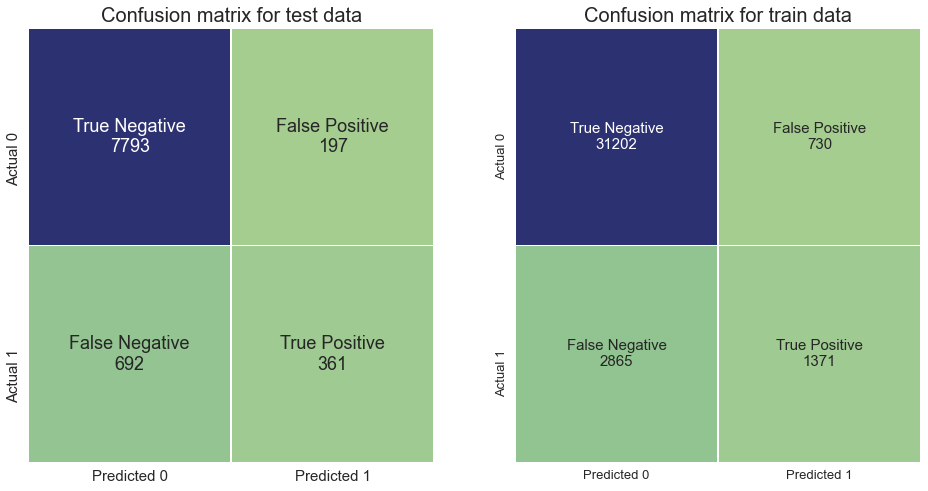

In [73]:
#Vizualising the confusion matrix using a heatmap

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
labels=[["True Negative\n"+str(test_cm.iloc[0,0]),"False Positive\n"+str(test_cm.iloc[0,1])],["False Negative\n"+str(test_cm.iloc[1,0]),"True Positive\n"+str(test_cm.iloc[1,1])]]
sns.heatmap(test_cm,annot=labels,cbar=False,cmap="crest",linewidths=0.5,fmt="s",annot_kws={"size":18})
plt.title('Confusion matrix for test data', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1,2,2)
labels=[["True Negative\n"+str(train_cm.iloc[0,0]),"False Positive\n"+str(train_cm.iloc[0,1])],["False Negative\n"+str(train_cm.iloc[1,0]),"True Positive\n"+str(train_cm.iloc[1,1])]]
sns.heatmap(train_cm,annot=labels,cbar=False,cmap="crest",linewidths=0.5,fmt="s",annot_kws={"size":15})
plt.title('Confusion matrix for train data', fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

###### Various Evaluation Metrics

In [74]:
# Computing the different parameters from the confusion matrix

tp = train_cm.iloc[1,0]; tn = train_cm.iloc[0,0]; fp = train_cm.iloc[0,1]; fn = train_cm.iloc[1,0]

tp_1 = test_cm.iloc[1,0]; tn_1 = test_cm.iloc[0,0]; fp_1 = test_cm.iloc[0,1]; fn_1 = test_cm.iloc[1,0]

In [75]:
# Making a dataframe df_scores to store the metrics of train and test 

df_scores = pd.DataFrame(columns = ['Accuracy','Precision','Recall','Specificity','FPR','F1_score'])

df_scores.loc['Train_logistic','Accuracy'] = accuracy_score(y_train, y_train_pred)
df_scores.loc['Train_logistic','Precision'] = precision_score(y_train, y_train_pred)
df_scores.loc['Train_logistic','Recall'] = recall_score(y_train, y_train_pred)
df_scores.loc['Train_logistic','Specificity'] = tn / (tn+fp)
df_scores.loc['Train_logistic','FPR']  = fp / (tn+fp)
df_scores.loc['Train_logistic','F1_score'] = f1_score(y_train, y_train_pred)

df_scores.loc['Test_logistic','Accuracy'] = accuracy_score(y_test, y_test_pred)
df_scores.loc['Test_logistic','Precision'] = precision_score(y_test, y_test_pred)
df_scores.loc['Test_logistic','Recall'] = recall_score(y_test, y_test_pred)
df_scores.loc['Test_logistic','Specificity'] = tn_1 / (tn_1+fp_1)
df_scores.loc['Test_logistic','FPR']  = fp_1 / (tn_1+fp_1)
df_scores.loc['Test_logistic','F1_score'] = f1_score(y_test, y_test_pred)

df_scores

,Accuracy,Precision,Recall,Specificity,FPR,F1_score
Train_logistic,0.900603,0.652546,0.323654,0.977139,0.022861,0.432697
Test_logistic,0.901692,0.646953,0.34283,0.975344,0.024656,0.448169


In [76]:
# calculating the above evaluation metrics using classification_report
acc_table = classification_report(y_test, y_test_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7990
           1       0.65      0.34      0.45      1053

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



Note: 
* The computed high value of accuracy cannot be relied as the data is heavily imbalanced. <br>
* The lower the FPR, the better the model

######  Kappa Score

In [77]:
kappa=cohen_kappa_score(y_test,y_test_pred)
kappa

0.3997497223388866

Takeaway: As the kappa score for the full model (with cut-off probability 0.5) is 0.399, we can say that there is a fair agreement between the actual and predicted values

####  ROC Curve and AUC Score

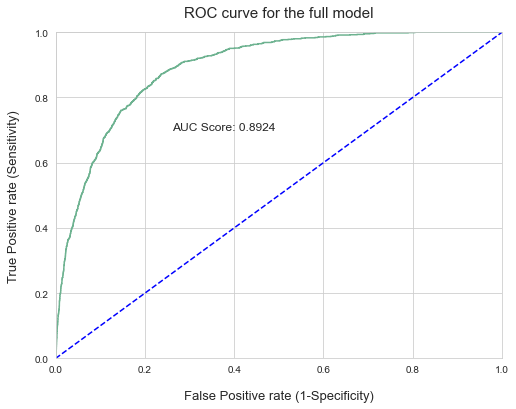

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score

# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
auc_sc=roc_auc_score(y_test,y_test_prob).round(4)

# Plot the ROC curve for our base model
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

# Plotting the ROC curve of a random classifier, showing the worst prediction
plt.plot([0,1],[0,1],"b--") 

plt.title("ROC curve for the full model",fontsize=15,pad=15)
plt.xlabel("False Positive rate (1-Specificity)",fontsize=13,labelpad=15)
plt.ylabel("True Positive rate (Sensitivity)",fontsize=13,labelpad=15)

# Add the AUC score to the plot
plt.text(0.26,0.7,"AUC Score: "+str(auc_sc),fontsize=12)

plt.show()

Takeaway: The farther the ROC curve of the full model (plotted as green line) is away from the ROC curve of the random classifier (plotted as the blue dotted line), the better is the seperability of the model.<br><br>
AUC Score increases as the seperability belween the classes of the target variable increases

#### Cross Entropy

In [79]:
cross_ent=log_loss(y_test,y_test_prob)
print(cross_ent)

0.2476650993634636


As the prediction goes closer to actual value the cross entropy decreases

#### Choosing the best cut-off value

###### (i) Tabular Method: Comparing Performance Metrics

In [80]:
# Finding the optimum threshold value by comparing performance metrics

threshold = [0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9]
score_card = pd.DataFrame(columns = ['AUC_score','Precision','Recall','Accuracy','Kappa','F1_score'])

for value in threshold:
    y_test_pred = y_test_prob.apply(lambda x: 0 if x<value else 1)
    score_card.loc[value,'AUC_score'] = roc_auc_score(y_test, y_test_pred)
    score_card.loc[value,'Precision'] = precision_score(y_test, y_test_pred)
    score_card.loc[value,'Recall'] = recall_score(y_test, y_test_pred)
    score_card.loc[value,'Accuracy'] = accuracy_score(y_test, y_test_pred)
    score_card.loc[value,'Kappa']  = cohen_kappa_score(y_test, y_test_pred)
    score_card.loc[value,'F1_score'] = f1_score(y_test, y_test_pred)
score_card
score_card.style.highlight_max(color = 'lightblue' , subset = ['AUC_score','Precision','Recall','Accuracy','Kappa','F1_score'])

,AUC_score,Precision,Recall,Accuracy,Kappa,F1_score
0.1,0.815402,0.338246,0.849953,0.788897,0.380754,0.483915
0.2,0.764071,0.470461,0.620133,0.874489,0.464054,0.535027
0.3,0.716243,0.540000,0.487179,0.891961,0.451665,0.512232
0.4,0.680933,0.592645,0.397911,0.898043,0.422070,0.476136
0.5,0.659087,0.646953,0.342830,0.901692,0.399750,0.448169
0.6,0.623718,0.665871,0.264957,0.898927,0.334992,0.379076
0.7,0.588724,0.718978,0.187085,0.896826,0.261393,0.296910
0.8,0.558088,0.748538,0.121557,0.892956,0.182554,0.209150
0.9,0.530375,0.744444,0.063628,0.888422,0.100745,0.117235


Takeaway: From the above table , the best performance metrics are associated with the cut-off 0.2

In [81]:
y_pred_cost=[0 if x<0.2 else 1 for x in y_test_prob]
y_pred_cost[0:5]

[1, 0, 0, 0, 0]

###### Confusion matrix associated with the new y predicted

In [82]:
cm_cost=pd.DataFrame(confusion_matrix(y_test,y_pred_cost),columns=["Predicted 0","Predicted 1"],index=["Actual 0","Actual 1"])
cm_cost

,Predicted 0,Predicted 1
Actual 0,7255,735
Actual 1,400,653


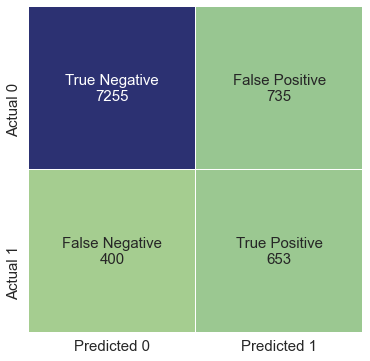

In [83]:
#Vizualizing using heatmap
plt.figure(figsize=(6,6))
label_cost=[["True Negative\n"+str(cm_cost.iloc[0,0]),"False Positive\n"+str(cm_cost.iloc[0,1])],["False Negative\n"+str(cm_cost.iloc[1,0]),"True Positive\n"+str(cm_cost.iloc[1,1])]]
sns.heatmap(cm_cost,cbar=False,annot=label_cost,annot_kws={"size":15},cmap="crest",linewidths=0.5,fmt="")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Takeaway: Compared to the initial prediction, when the cutoff found using the cost method is used, the False Negatives have dropped and False Positives have increased.

In [84]:
# The classification report for the associated cutoff is as follows
print(classification_report(y_test,y_pred_cost))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      7990
           1       0.47      0.62      0.54      1053

    accuracy                           0.87      9043
   macro avg       0.71      0.76      0.73      9043
weighted avg       0.89      0.87      0.88      9043



In [85]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred_cost)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.4640544394017285


**Interpretation:** As the kappa score for the full model (with cut-off probability 0.50) is 0.39, we can say that now there is a moderate agreement between the actual and predicted values.

###### (ii)Youden's Index

In [86]:
#Selecting the cut-off for which the TPR-FPR is the maximum
youden_table=pd.DataFrame({"Cut-off":thresholds,"TPR":tpr,"FPR":fpr,"Difference":tpr-fpr})
youden_table.sort_values("Difference",ascending=False).head()

,Cut-off,TPR,FPR,Difference
1029,0.093130,0.872745,0.237046,0.635698
1025,0.093538,0.870845,0.235920,0.634925
1027,0.093176,0.871795,0.236921,0.634874
1028,0.093142,0.871795,0.237046,0.634749
1023,0.093675,0.869896,0.235544,0.634351


Takeaway: From the Youden's table, the highest value for TPR-FPR is associated with the cut-off 0.093

In [87]:
y_pred_youden=[0 if x<0.093 else 1 for x in y_test_prob]
y_pred_youden[0:5]

[1, 0, 0, 0, 0]

###### Confusion matrix for the new y predicted

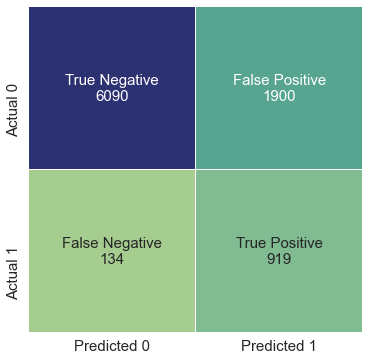

In [88]:
cm_youden=pd.DataFrame(confusion_matrix(y_test,y_pred_youden),
                       columns=["Predicted 0","Predicted 1"],index=["Actual 0","Actual 1"])

# Vizualizong using a heatmap
plt.figure(figsize=(6,6))
labels_youden=[["True Negative\n"+str(cm_youden.iloc[0,0]),"False Positive\n"+str(cm_youden.iloc[0,1])],
               ["False Negative\n"+str(cm_youden.iloc[1,0]),"True Positive\n"+str(cm_youden.iloc[1,1])]]
sns.heatmap(cm_youden,annot=labels_youden,linewidths=0.5,fmt="",cbar=False,cmap="crest",annot_kws={"size":15})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Takeaway: Compared to the previous prediction, number of False Negatives has droped remarkably, although True Predictions have also been dropped.

In [89]:
#The associated classification report is given below
print(classification_report(y_test,y_pred_youden))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      7990
           1       0.33      0.87      0.47      1053

    accuracy                           0.78      9043
   macro avg       0.65      0.82      0.67      9043
weighted avg       0.90      0.78      0.81      9043



Takeaway: The recall value for '1' has improved significantly.

In [90]:
kappa_youden=cohen_kappa_score(y_test,y_pred_youden)
kappa_youden

0.36743712927323435

Takeaway: The kappa score has changed from 0.39 to 0.36. We can say that the model has fair agreement between the actual and the predicted values

###### (ii) Cost-based method

In [91]:
cut_off=np.arange(0,1,0.01)
cutoff_cost=pd.DataFrame(columns=["cut-off"])

def calc_totalcost(y_true,y_pred,cost_fn,cost_fp):
    cm=confusion_matrix(y_true,y_pred)
    return cm[1,0]*cost_fn+cm[0,1]*cost_fp

for val in cut_off:
    y_pred_cost=[0 if x<val else 1 for x in y_test_prob]
    total_cost=calc_totalcost(y_test,y_pred_cost,3.5,2)
    cutoff_cost=cutoff_cost.append({"cut-off":val,"total cost":total_cost},ignore_index=True)

In [92]:
cutoff_cost.sort_values("total cost",ascending=True).head()

,cut-off,total cost
30,0.30,2764.0
29,0.29,2765.0
31,0.31,2765.5
27,0.27,2767.0
26,0.26,2773.0


Takeaway: From the table above the least total cost is associated with the cut-off 0.30.

In [93]:
y_pred_cost=[0 if x<0.30 else 1 for x in y_test_prob]
y_pred_cost[0:5]

[1, 0, 0, 0, 0]

###### Confusion matrix associated with the new y predicted

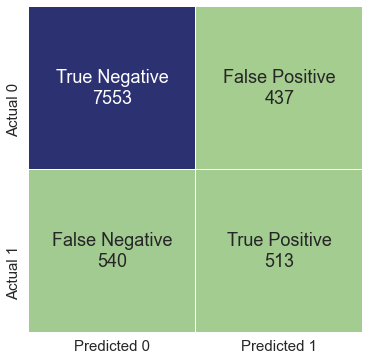

In [94]:
cm_cost=pd.DataFrame(confusion_matrix(y_test,y_pred_cost),columns=["Predicted 0","Predicted 1"],index=["Actual 0","Actual 1"])

#Vizualizing using heatmap
plt.figure(figsize=(6,6))
label_cost=[["True Negative\n"+str(cm_cost.iloc[0,0]),"False Positive\n"+str(cm_cost.iloc[0,1])],
            ["False Negative\n"+str(cm_cost.iloc[1,0]),"True Positive\n"+str(cm_cost.iloc[1,1])]]
sns.heatmap(cm_cost,cbar=False,annot=label_cost,annot_kws={"size":18},cmap="crest",linewidths=0.5,fmt="")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Takeaway: Compared to the initial prediction, when the cutoff found using the cost method is used, the False Negatives have dropped and True Positives have increased.

In [95]:
# The classification report for the associated cutoff is as follows
print(classification_report(y_test,y_pred_cost))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7990
           1       0.54      0.49      0.51      1053

    accuracy                           0.89      9043
   macro avg       0.74      0.72      0.73      9043
weighted avg       0.89      0.89      0.89      9043



In [96]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred_cost)
print('kappa value:',kappa)

kappa value: 0.4516648607109456


**Interpretation:** As the kappa score for the full model (with cut-off probability 0.50) is 0.39, we can say here that there is moderate agreement between the actual and predicted values.

#### Recursive Feature Elimination (RFE)

There are two important configuration options when using RFE: the choice in the 
number of features to select and the choice of the algorithm used to help choose 
features.

###### Choosing the right number of significant features

In [97]:
score_card = pd.DataFrame(columns = ['AUC_score','Precision','Recall','Accuracy','Kappa','F1_score'])

X_train_rfe = X_train.iloc[:,1:]
X_test_rfe = X_test.iloc[:,1:]


for i in range(1,len(X_train_rfe.columns)+1):
    lg = LogisticRegression()
    rfe = RFE(estimator=lg,n_features_to_select=i)
    rfe_model = rfe.fit(X_train_rfe,y_train)
    feature = X_train_rfe.columns[rfe_model.support_]
    model = lg.fit(X_train_rfe[feature],y_train)
    
    count = len(feature)
    
    y_test_pred = model.predict(X_test_rfe[feature])
    score_card.loc[count,'AUC_score'] = roc_auc_score(y_test, y_test_pred)
    score_card.loc[count,'Precision'] = precision_score(y_test, y_test_pred)
    score_card.loc[count,'Recall'] = recall_score(y_test, y_test_pred)
    score_card.loc[count,'Accuracy'] = accuracy_score(y_test, y_test_pred)
    score_card.loc[count,'Kappa']  = cohen_kappa_score(y_test, y_test_pred)
    score_card.loc[count,'F1_score'] = f1_score(y_test, y_test_pred)
    score_card.loc[count,'features'] = list(feature.values)
score_card

,AUC_score,Precision,Recall,Accuracy,Kappa,F1_score,features
1,0.5,0.0,0.0,0.883556,0.0,0.0,month
2,0.576577,0.660305,0.164292,0.892845,0.227263,0.263118,"[month, poutcome]"
3,0.576577,0.660305,0.164292,0.892845,0.227263,0.263118,"[job, month, poutcome]"
4,0.576577,0.660305,0.164292,0.892845,0.227263,0.263118,"[job, day, month, poutcome]"
5,0.575215,0.658915,0.161443,0.892624,0.223768,0.259344,"[job, marital, day, month, poutcome]"
6,0.64192,0.63834,0.306743,0.899038,0.366482,0.414368,"[job, marital, day, month, duration, poutcome]"
7,0.643694,0.638672,0.310541,0.899259,0.369882,0.417891,"[job, marital, contact, day, month, duration, ..."
8,0.65354,0.650467,0.330484,0.90136,0.390463,0.438287,"[job, marital, housing, contact, day, month, d..."
9,0.655064,0.645872,0.334283,0.901139,0.392282,0.440551,"[job, marital, housing, loan, contact, day, mo..."
10,0.653989,0.642202,0.332384,0.900697,0.389563,0.438048,"[job, marital, housing, loan, contact, day, mo..."


Takeaway: The F1-Score shows a linear improvement from values 1 to 9. Henceforth 
the score remains almost constant.

In [98]:
log_reg = LogisticRegression()

rfe_model=RFE(estimator=log_reg,n_features_to_select=9)
rfe_model=rfe_model.fit(X_train.iloc[:,1:],y_train)

In [99]:
feat_index=pd.Series(data=rfe_model.ranking_,index=X_train.iloc[:,1:].columns)
sign_feat_rfe=feat_index[feat_index==1].index
sign_feat_rfe

Index(['job', 'marital', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'poutcome'],
      dtype='object')

###### Building Logit model with the significant features

In [100]:
X_train_rfe=X_train[["const"]].join(X_train[sign_feat_rfe])
X_test_rfe=X_test[["const"]].join(X_test[sign_feat_rfe])

log_model_rfe=sm.Logit(y_train,X_train_rfe).fit()
log_model_rfe.summary()

Optimization terminated successfully.
         Current function value: 0.253198
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                36168
Model:                          Logit   Df Residuals:                    36158
Method:                           MLE   Df Model:                            9
Date:                Wed, 27 Apr 2022   Pseudo R-squ.:                  0.2989
Time:                        12:34:35   Log-Likelihood:                -9157.7
converged:                       True   LL-Null:                       -13062.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8460      0.132    -21.579      0.000      -3.105      -2.588
job           -0.8978      0.274     -3.279      0.001      -1.434      -0.361
marital        1.0027      0.107      9.412      0.000       0.794       1.211
housing       -0.6822      0.043    -15.975      0.000      -0.766      -0.598
loan          -0.6126      0.064     -9.548      0.000      -0.738      -0.487
contact        0.9093      0.065     13.985      0.000       0.782       1.037
day           -1.3166      0.290     -4.547      0.000      -1.884      -0.749
month         -3.1501      0.241    -13.046      0.000      -3.623      -2.677
duration       1.0508      0.018     58.430      0.000       1.016       1.086
poutcome       2.5970      0.068     37.958      0.000       2.463       2.731
==============================================================================
"""

###### AIC score

In [101]:
print(log_model_rfe.aic)

18335.341405728406


###### Computing the y predicted

In [102]:
y_pred_rfe_prob=log_model_rfe.predict(X_test_rfe)
# Using the threshold from Youden's index method
y_pred_rfe=[0 if x<0.093 else 1 for x in y_pred_rfe_prob]

###### Plotting the confusion matrix

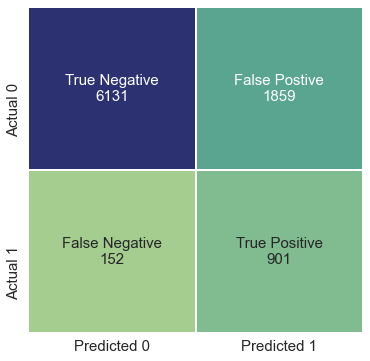

In [103]:
cm=pd.DataFrame(confusion_matrix(y_test,y_pred_rfe),columns=["Predicted 0","Predicted 1"],index=["Actual 0","Actual 1"])

# Vizualizing using heatmap
plt.figure(figsize=(6,6))
labels_rfe=[["True Negative\n"+str(cm.iloc[0,0]),"False Postive\n"+str(cm.iloc[0,1])],
            ["False Negative\n"+str(cm.iloc[1,0]),"True Positive\n"+str(cm.iloc[1,1])]]
sns.heatmap(cm,cbar=False,cmap="crest",annot=labels_rfe,fmt="",annot_kws={"size":15},linewidths=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

###### Evaluation metrics

In [104]:
print(classification_report(y_test,y_pred_rfe))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      7990
           1       0.33      0.86      0.47      1053

    accuracy                           0.78      9043
   macro avg       0.65      0.81      0.67      9043
weighted avg       0.90      0.78      0.81      9043



###### Plotting the ROC curve:

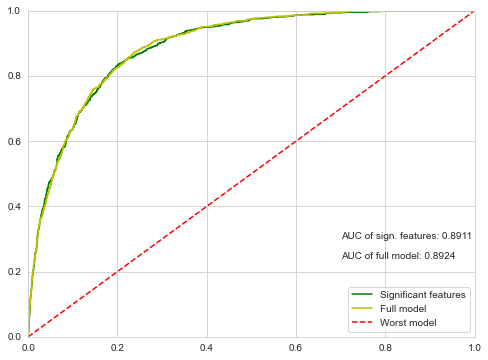

In [105]:
fpr_rfe,tpr_rfe,thresholds_rfe = roc_curve(y_test,y_pred_rfe_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr_rfe,tpr_rfe,"g") # ROC Curve for the model with significant features alone
plt.plot(fpr,tpr,"y") # ROC Curve for the full model
plt.plot([0,1],[0,1],"r--") # ROC curve for a random classifier

plt.xlim(0,1)
plt.ylim(0,1)

plt.legend(["Significant features","Full model","Worst model"])
plt.text(0.7,0.3,"AUC of sign. features: "+str(roc_auc_score(y_test,y_pred_rfe_prob).round(4)))
plt.text(0.7,0.24,"AUC of full model: "+str(roc_auc_score(y_test,y_test_prob).round(4)))
plt.show()

Takeaway: There isn’t a 
significant difference 
between the AUC Score 
of the full model and 
the model built with the 
significant features 
alone.

### Preprocessing for Final Model

In [150]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,Week1,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,Week1,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,Week1,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,Week1,may,92,1,-1,0,unknown,no
4,33,blue-collar,single,secondary,no,1,no,no,unknown,Week1,may,198,1,-1,0,unknown,no


In [151]:
# Dividing the dependent and independent features

X= df_bank.drop('y', axis= 1)
y= df_bank['y']

In [152]:
# Dummy encoding the categorical variables

y= df_bank['y'].map({'no':0, 'yes':1})

X_num= X.select_dtypes(np.number)
X_cat= X.select_dtypes(object)

X_cat_dummy= pd.get_dummies(X_cat)

X= pd.concat([X_num, X_cat_dummy], axis= 1)

In [153]:
# Train_test Split
# Stratified shuffle split to balance the target classes in train & test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14, stratify = y)
print("Shape of Training Set:", X_train.shape, y_train.shape)
print("Shape of Test Set:", X_test.shape, y_test.shape)

Shape of Training Set: (31647, 53) (31647,)
Shape of Test Set: (13564, 53) (13564,)


In [166]:
# Making function to store metrics of different Models and compare it

score_card= pd.DataFrame()

def performance_scores(df, model, y, y_pred, y_pred_proba):
    cm = confusion_matrix(y,y_pred)
    tp = cm[1,0]; tn = cm[0,0]; fp = cm[0,1]; fn = cm[1,0]
    df.loc[model,'Accuracy'] = accuracy_score(y, y_pred)
    df.loc[model,'Precision'] = precision_score(y, y_pred)
    df.loc[model,'Recall'] = recall_score(y, y_pred)
    df.loc[model,'F1_score'] = f1_score(y, y_pred)
    df.loc[model,'Kappa_score'] = cohen_kappa_score(y, y_pred)
    df.loc[model,'AUC_score']=roc_auc_score(y,y_pred_proba[:,1])

In [167]:
# Creating dictionary of model

algo_dict= {"Logistic Regression": LogisticRegression(random_state= 2),
            "Decision Tree Classifier": DecisionTreeClassifier(random_state= 2),
            "Random Forest Classifier": RandomForestClassifier(random_state= 2),
            "Ada Boosting": AdaBoostClassifier(random_state= 2),
            "Gradient Boosting": GradientBoostingClassifier(random_state= 2),
            "XGBoost Classifier": XGBClassifier(random_state = 2 , eval_metric='logloss')}

# Model Performance of different classes
for i,j in algo_dict.items():
    j.fit(X_train, y_train)
    y_pred = j.predict(X_test)
    y_pred_prob = j.predict_proba(X_test)
    performance_scores(df= score_card, model= i, y= y_test, y_pred= y_pred, y_pred_proba=y_pred_prob)
    
score_card
score_card.style.highlight_max(color = 'lightblue' , subset = ['Accuracy','Precision','Recall','F1_score', 'Kappa_score','AUC_score'])

,Accuracy,Precision,Recall,F1_score,Kappa_score,AUC_score
Logistic Regression,0.895459,0.624082,0.267801,0.374780,0.327530,0.875410
Decision Tree Classifier,0.876290,0.471001,0.465658,0.468314,0.398319,0.698179
Random Forest Classifier,0.903495,0.648822,0.381853,0.480762,0.431473,0.929169
Ada Boosting,0.900619,0.629469,0.366100,0.462948,0.412384,0.914629
Gradient Boosting,0.906886,0.659763,0.421550,0.514418,0.465673,0.929991
XGBoost Classifier,0.906665,0.629540,0.491493,0.552017,0.500803,0.933904


In [168]:
# Using SMOTE to balance the X_train and y_train

from imblearn.over_sampling import SMOTE
smote= SMOTE()

x_smote, y_smote= smote.fit_resample(X_train, y_train)

In [170]:
# Comparing the model performance after doing SMOTE

score_card_smote= pd.DataFrame()

for i,j in algo_dict.items():
    j.fit(x_smote, y_smote)
    y_pred = j.predict(X_test)
    y_pred_prob=j.predict_proba(X_test)
    performance_scores(df= score_card_smote, model= i, y= y_test, y_pred= y_pred,y_pred_proba=y_pred_prob)
    
score_card_smote
score_card_smote.style.highlight_max(color = 'lightblue' , subset = ['Accuracy','Precision','Recall','F1_score', 'Kappa_score',"AUC_score"])

,Accuracy,Precision,Recall,F1_score,Kappa_score,AUC_score
Logistic Regression,0.886907,0.516328,0.528040,0.522118,0.457992,0.881019
Decision Tree Classifier,0.872235,0.458142,0.503466,0.479736,0.407096,0.712282
Random Forest Classifier,0.904084,0.636190,0.420920,0.506636,0.455944,0.925550
Ada Boosting,0.896270,0.572581,0.447385,0.502299,0.445373,0.899279
Gradient Boosting,0.904011,0.601568,0.531821,0.564548,0.510838,0.926493
XGBoost Classifier,0.904600,0.609084,0.515438,0.558362,0.505302,0.929941


### Model Validation

In [114]:
# Using the best performing three models from above for further analysis

models_dict = {'Random Forest': RandomForestClassifier(random_state= 2), 
               'XGBoost': XGBClassifier(random_state = 2 , eval_metric='logloss'), 
               "Gradient Boosting": GradientBoostingClassifier(random_state= 2)}

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import make_scorer
kappa = make_scorer(cohen_kappa_score)

cv= StratifiedKFold(n_splits = 5, shuffle = True, random_state=10)

In [115]:
# In order to find out how well the results will generalize, we have to use
# cross validation to calculate and compare the prediction scores.

# Define the function for calculating cross validated scores
def cross_validate_model(model_name, X, y, cross_val_dataframe):
    model = models_dict[model_name]
    accuracy_scores = cross_val_score(model, X, y, cv = cv, scoring ='accuracy')
    precision_scores = cross_val_score(model, X, y, cv = cv, scoring ='precision')
    recall_scores = cross_val_score(model, X, y, cv = cv, scoring ='recall')
    f1_scores = cross_val_score(model, X, y, cv = cv, scoring ='f1')
    kappa_scores = cross_val_score(model, X, y, cv = cv, scoring = kappa)
    mean_scores = [accuracy_scores.mean(), precision_scores.mean(), recall_scores.mean(), f1_scores.mean(), kappa_scores.mean()]
    cross_val_dataframe.loc[model_name, ['accuracy', 'precision', 'recall', 'f1_score', 'kappa']] = mean_scores
   


In [116]:


def cross_validate_model_var(model_name, X, y, cross_val_dataframe_var):
    model = models_dict[model_name]
    accuracy_scores = cross_val_score(model, X, y, cv = cv, scoring ='accuracy')
    precision_scores = cross_val_score(model, X, y, cv = cv, scoring ='precision')
    recall_scores = cross_val_score(model, X, y, cv = cv, scoring ='recall')
    f1_scores = cross_val_score(model, X, y, cv = cv, scoring ='f1')
    kappa_scores = cross_val_score(model, X, y, cv = cv, scoring = kappa)
    variance_score = [accuracy_scores.var(), precision_scores.var(), recall_scores.var(), f1_scores.var(), kappa_scores.var()]
    cross_val_dataframe_var.loc[model_name, ['var_accuracy', 'var_precision', 'var_recall', 'var_f1_score', 'var_kappa']] = variance_score


In [117]:
# Variance in score obtained from cross validation



df_cross_val = pd.DataFrame()

for i,j in models_dict.items():
    cross_validate_model(i, X_train, y_train, df_cross_val)

df_cross_val
df_cross_val.style.highlight_max(color = 'lightblue' , subset = ['accuracy', 'precision', 'recall', 'f1_score', 'kappa'])

,accuracy,precision,recall,f1_score,kappa
Random Forest,0.904509,0.662417,0.375206,0.478923,0.430770
XGBoost,0.905173,0.626816,0.468935,0.536216,0.484651
Gradient Boosting,0.905552,0.654982,0.407350,0.502013,0.452994


In [118]:
df_cross_val_var = pd.DataFrame()

for i,j in models_dict.items():
    cross_validate_model_var(i, X_train, y_train, df_cross_val_var)

df_cross_val_var

# The variance obtained is  very low which means our model is performing consistent

,var_accuracy,var_precision,var_recall,var_f1_score,var_kappa
Random Forest,0.000008,0.000554,0.000200,0.000246,0.000285
XGBoost,0.000004,0.000181,0.000355,0.000164,0.000177
Gradient Boosting,0.000003,0.000147,0.000371,0.000235,0.000241


In [119]:
# Checking cross val score for SMOTE data

df_cross_val_smote= pd.DataFrame()

for i,j in models_dict.items():
    cross_validate_model(i, x_smote, y_smote, df_cross_val_smote)
    
df_cross_val_smote
df_cross_val_smote.style.highlight_max(color = 'lightblue' , subset = ['accuracy', 'precision', 'recall', 'f1_score', 'kappa'])

# Taking the values of the negative class.

,accuracy,precision,recall,f1_score,kappa
Random Forest,0.948900,0.966393,0.930149,0.947921,0.897799
XGBoost,0.947951,0.956771,0.938307,0.947442,0.895903
Gradient Boosting,0.943729,0.954214,0.932188,0.943070,0.887458


In [120]:
# Defining function for plotting roc curve

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import log_loss

def plot_roc_curve(model_name, y_test, y_test_prob, ax):
    plot_roc_curve.counter +=1
    if plot_roc_curve.counter == 1:
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.0])
        ax.plot([0, 1], [0, 1],'r--') 

        ax.set_xlabel('False positive rate (1-Specificity)', fontsize = 15)
        ax.set_ylabel('True positive rate (Sensitivity)', fontsize = 15)
        ax.set_title('ROC Curve Analysis', fontsize = 15)
        
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
    ax.plot(fpr, tpr, label=model_name)
    ax.legend(loc = 'lower right')

    offset = 0.1*plot_roc_curve.counter
    auc_score = round(roc_auc_score(y_test, y_test_prob), 4)
    ax.text(x = 0.02, y = 1-offset, s = 'AUC Score for {0} = {1}'.format(model_name,auc_score))
    plt.grid(True)

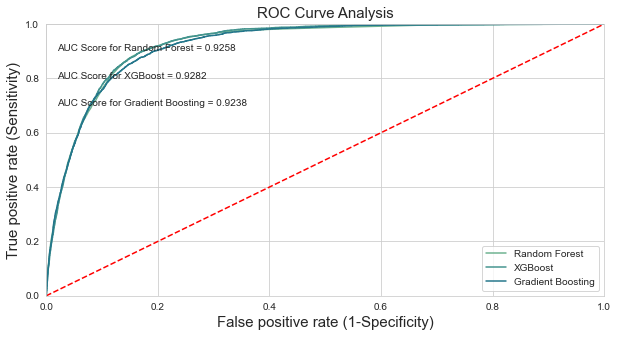

In [121]:
# Plot & compare the ROC curves

from sklearn.model_selection import cross_val_predict

plot_roc_curve.counter = 0
fig, ax = plt.subplots(1, figsize=(10,5))
for model_name in models_dict:
    model = models_dict[model_name]
    y_pred_prob = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba')
    plot_roc_curve(model_name, y_train, y_pred_prob[:,1], ax)

plt.show()

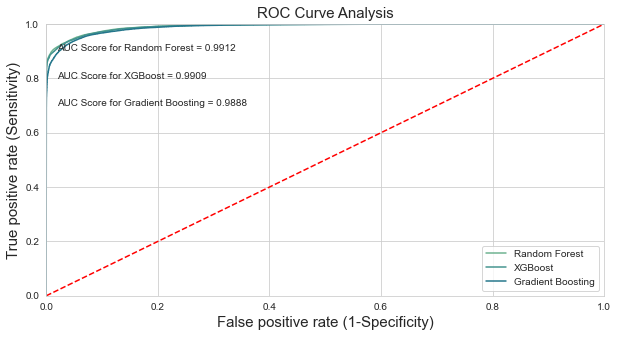

In [122]:
# ROC curves for SMOTE model

from sklearn.model_selection import cross_val_predict

plot_roc_curve.counter = 0
fig, ax = plt.subplots(1, figsize=(10,5))
for model_name in models_dict:
    model = models_dict[model_name]
    y_pred_prob = cross_val_predict(model, x_smote, y_smote, cv= cv, method= 'predict_proba')
    plot_roc_curve(model_name, y_smote, y_pred_prob[:,1], ax)

plt.show()

We find that XGBoost has the highest baseline performance in terms of recall and AUC score. Hence, we can proceed with the XGBoost model for finetuning

In [123]:
# Comparing test scores on SMOTE data and the data without SMOTE

xgb = XGBClassifier(n_estimators = 100, random_state=15, importance_type='total_gain', verbosity = 0)

xgb_model = xgb.fit(X_train, y_train)

xgb_model_smote = xgb.fit(x_smote, y_smote)

score_card_comp = pd.DataFrame()

performance_scores(score_card_comp,  'XGB model without SMOTE', y_test, xgb_model.predict(X_test),xgb_model.predict_proba(X_test))
performance_scores( score_card_comp, 'XGB model with SMOTE', y_test,  xgb_model_smote.predict(X_test),xgb_model_smote.predict_proba(X_test))

score_card_comp


,Accuracy,Precision,Recall,F1_score,Kappa_score
XGB model without SMOTE,0.907402,0.62397,0.52489,0.570157,0.518702
XGB model with SMOTE,0.907402,0.62397,0.52489,0.570157,0.518702


Though the performance was looking good for SMOTE on train data but the test performance is similar.

### Hyperparameter Tuning

In [124]:
# Using RandomizedSearchCV for getting the best parameters

from sklearn.model_selection import RandomizedSearchCV

cv = StratifiedKFold(n_splits = 3, shuffle = True, random_state=10)
params = {'n_estimators' : np.arange(100,1001,100),
              'learning_rate' : np.arange(0,1,0.1),
              'class_weight': [{0: w, 1: 1-w} for w in np.arange(0.1,0.6,0.1)],
              'max_depth' : np.arange(20,41,5)}

# xgb_grid = RandomizedSearchCV(xgb_model, param_grid=params, scoring='roc_auc', cv=cv)
# xgb_grid.fit(X_train, y_train)
# xgb_grid.best_params_

In [125]:
best_params =  {'class_weight': {0: 0.5, 1: 0.5},
                'learning_rate': 0.16,
                'max_depth': 33,
                'n_estimators': 100}

In [126]:
# Build the model based on optimum hyperparameters

xgb_best = XGBClassifier(random_state=15, importance_type='total_gain', verbosity=0, **best_params)
xgb_best.fit(X_train, y_train)
y_test_pred = xgb_best.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11977
           1       0.61      0.48      0.54      1587

    accuracy                           0.90     13564
   macro avg       0.77      0.72      0.74     13564
weighted avg       0.89      0.90      0.90     13564



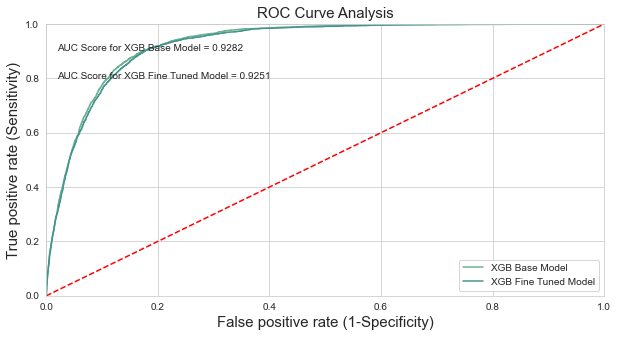

In [127]:
# Compare the ROC curves and AUC scores for fine-tuned model with base model

fig, ax = plt.subplots(1, figsize=(10,5))
plot_roc_curve.counter = 0
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state=10)

y_pred_prob = cross_val_predict(xgb_model, X_train, y_train, cv=cv, method='predict_proba')
plot_roc_curve('XGB Base Model', y_train, y_pred_prob[:,1], ax)
y_pred_prob = cross_val_predict(xgb_best, X_train, y_train, cv=cv, method='predict_proba')
plot_roc_curve('XGB Fine Tuned Model', y_train, y_pred_prob[:,1], ax)
plt.show()

In [128]:
# Choosing the optimum threshold for final model

threshold = np.arange(0,1,0.05)
score_card = pd.DataFrame()
y_test_prob = xgb_best.predict_proba(X_test)[:,1]
for value in threshold:
    y_test_pred = [0 if x<value else 1 for x in y_test_prob]
    performance_scores(score_card, value, y_test, y_test_pred,y_test_prob)
# score_card.sort_values(by='Recall', ascending=False).head()

,Accuracy,Precision,Recall,F1_score,Kappa_score
0.00,0.117001,0.117001,1.000000,0.209491,0.000000
0.05,0.875922,0.482183,0.818526,0.606868,0.538980
0.10,0.887570,0.513467,0.744802,0.607868,0.544821
0.15,0.895532,0.541342,0.701323,0.611035,0.551851
0.20,0.897818,0.553486,0.655325,0.600115,0.542017


In [ ]:
score_card.sort_values(by='Recall'	, ascending=False).head(10)

In [171]:
# Final prediction results for fine-tuned model

y_test_pred = [0 if x<0.05 else 1 for x in y_test_prob]
test_cm = confusion_matrix(y_test, y_test_pred)

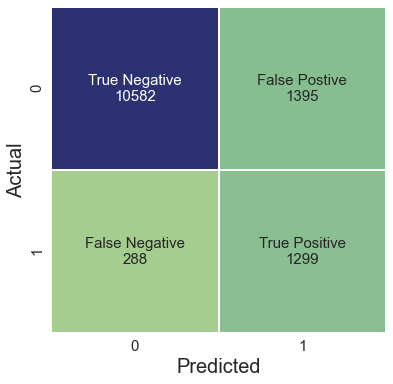

In [173]:
labels_final=[["True Negative\n"+str(test_cm[0,0]),"False Postive\n"+str(test_cm[0,1])],
            ["False Negative\n"+str(test_cm[1,0]),"True Positive\n"+str(test_cm[1,1])]]

plt.figure(figsize=(6,6))
sns.heatmap(test_cm,cbar=False,cmap="crest",annot=labels_final,fmt="",annot_kws={"size":15},linewidths=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Actual', fontsize=20); plt.xlabel('Predicted', fontsize=20)
plt.show()

### Model Interpretation

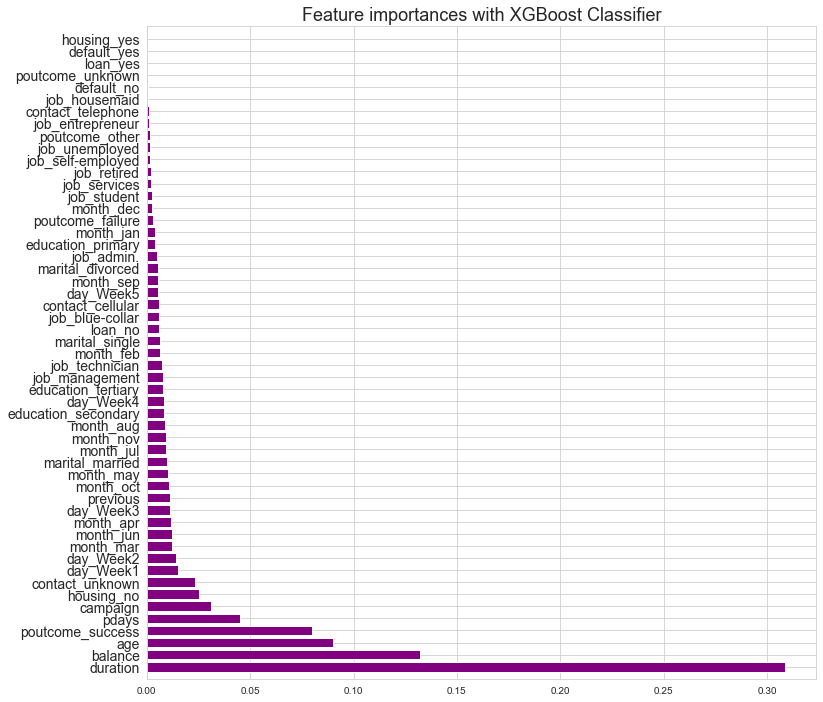

In [130]:
# Feature importance gives a measure of how significant a feature is for classifying the data. Here the metric
# used is total gain of information due to a feature.

features_imp = pd.DataFrame()
features_imp['features'] = X_train.columns
features_imp['importances'] = xgb_best.feature_importances_
features_imp.sort_values(by = 'importances', ascending=False, inplace=True)

# Plot the feature ranking

plt.figure(figsize=(12,12))
plt.barh(features_imp['features'], features_imp['importances'], color='purple',  align="center")

plt.title("Feature importances with XGBoost Classifier", fontsize=18)
plt.yticks(range(len(features_imp)), features_imp['features'], rotation='horizontal',fontsize=14)
plt.ylim([-1, len(features_imp)])
plt.show()

In [131]:
features_imp[:20].sum(numeric_only=True)

# Top 20 features account for more than 90% of the feature importance

importances    0.872194
dtype: float32

# CONCLUSION
### 1. Our model can predict 80% of the clients who are likely to subscribe with a 50% precision rate.
### 2. Duration and poutcome-success are the best predictors for success in customer subscribing to term deposit. Hence, the bank is advised to give high priority to the customers who had subscribed in the previous campaign. Also, increasing the duration of marketing calls can be done by making the calls more interactive and detail-oriented.
### 3. Since having an outstanding loan is found to be negatively correlated with subscribing to term deposit, the bank is advised to give a lower priority to such customers.